In [1]:
import os
import tifffile as tif
import numpy as np
import napari
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# change settings to show all columns in a dataframe
pd.set_option('display.max_columns', None)

# ignore napari warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # create napari viewer instance
    viewer = napari.Viewer() 

In [2]:
path = "/Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset"

nuclei_labels_path = os.path.join(path, "labels_nuclei")
actin_labels_path = os.path.join(path, "labels_actin")
tubulin_labels_path = os.path.join(path, "labels_tubulin")

In [3]:
filenames = [fname for fname in os.listdir(path) if fname.endswith(".tif")]
filenames

['aphidicolin_timelapse.tif',
 'nocodazole_timelapse.tif',
 'AZ-I_timelapse.tif',
 'taxol_timelapse.tif',
 'latrunculin B_timelapse.tif',
 'epothilone B_timelapse.tif',
 'monastrol_timelapse.tif',
 'AZ-H_timelapse.tif',
 'DMSO_timelapse.tif',
 'colchicine_timelapse.tif',
 'doxorubicin_timelapse.tif',
 'cytochalasin B_timelapse.tif',
 'AZ-A_timelapse.tif']

In [4]:
filename = "cytochalasin B_timelapse"

In [5]:
# read an image, which will be processed as an example
img = tif.imread(os.path.join(path, f'{filename}.tif'))

In [6]:
# load nuclei and actin segmentation
labels_nuclei = tif.imread(os.path.join(nuclei_labels_path, f'{filename}_labels_dapi.tif'))
labels_actin = tif.imread(os.path.join(actin_labels_path, f'{filename}_labels_actin.tif'))
labels_tubulin = tif.imread(os.path.join(tubulin_labels_path, f'{filename}_labels_tubulin.tif'))

In [7]:
# np.newaxis adds a new axis to convert to 2D timelapse (otherwise napari interprets an image with shape 8,y,x as a 3D image)
# new image dimension for each channel will be (8, 1, 1024, 1280)
# this is optional, and can also be done in the viewer Plugins -> Convert to 2D timelapse
img = img[:, np.newaxis, :, :, :]

# do the same for all label images
labels_actin = labels_actin[:, np.newaxis, :, :]
labels_nuclei = labels_nuclei[:, np.newaxis, :, :]
labels_tubulin = labels_tubulin[:, np.newaxis, :, :]

In [8]:
# viewer.add_image(img) # and then in the viewer right click on the layer - split RGB or:
viewer.add_image(
    img,
    name=["tubulin", "actin", "nuclei"],
    colormap=["magenta", "green", "blue"],
    channel_axis=4)

[<Image layer 'tubulin' at 0x17fbbc430>,
 <Image layer 'actin' at 0x103de9400>,
 <Image layer 'nuclei' at 0x296437f10>]

In [9]:
# add segmentation layers to the viewer
viewer.add_labels(labels_actin, name="actin_segmented")
viewer.add_labels(labels_nuclei, name="nuclei_segmented")
viewer.add_labels(labels_tubulin, name="tubulin_segmented")

<Labels layer 'tubulin_segmented' at 0x2ad59bbe0>

In [11]:
# load measurements csv
df = pd.read_csv(f'{filename}_measurements.csv')

In [12]:
viewer.layers['tubulin_segmented'].properties = df

### Dimensionality Reduction

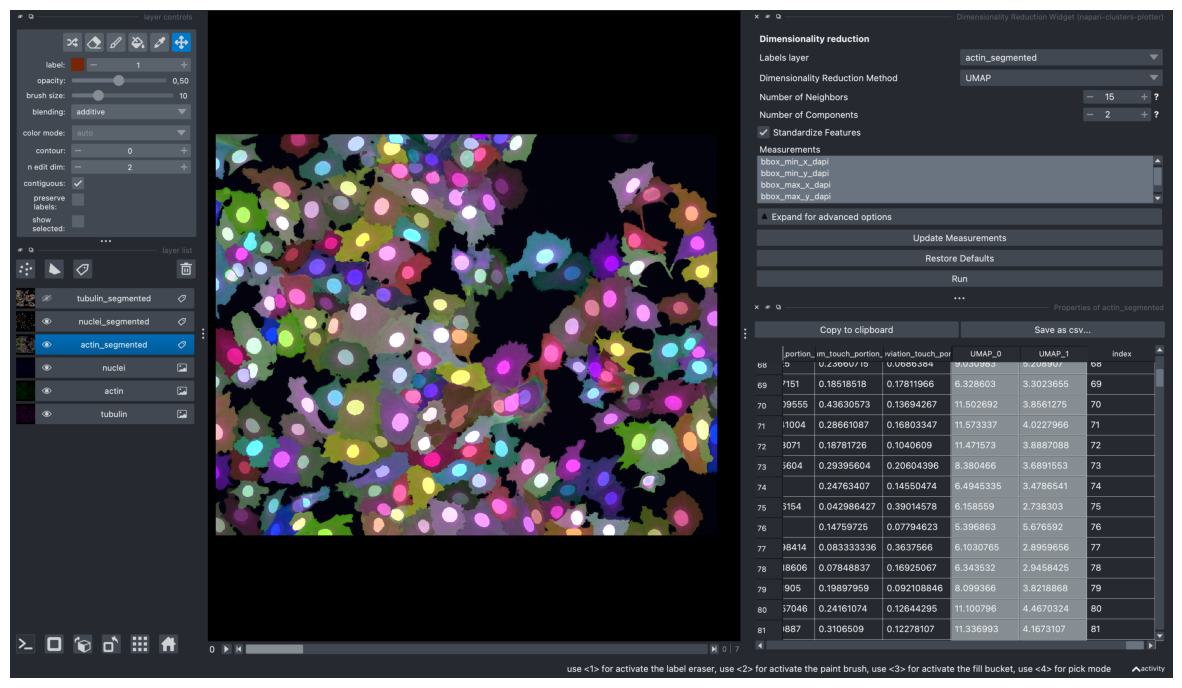

In [13]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

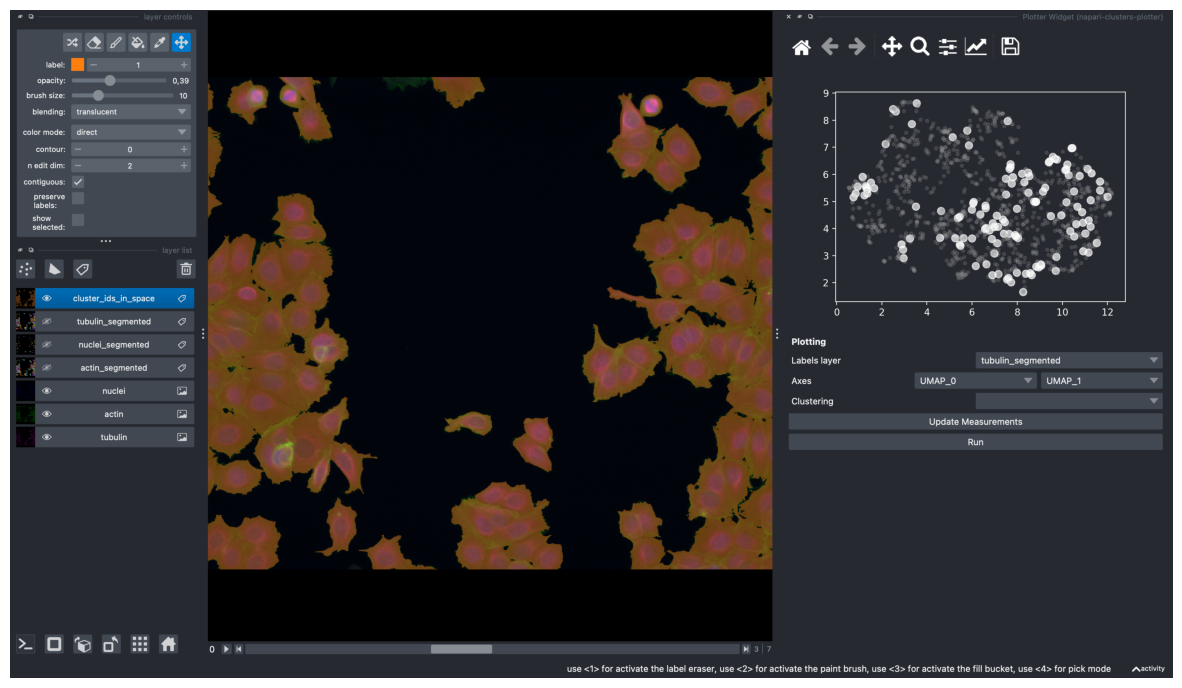

In [16]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

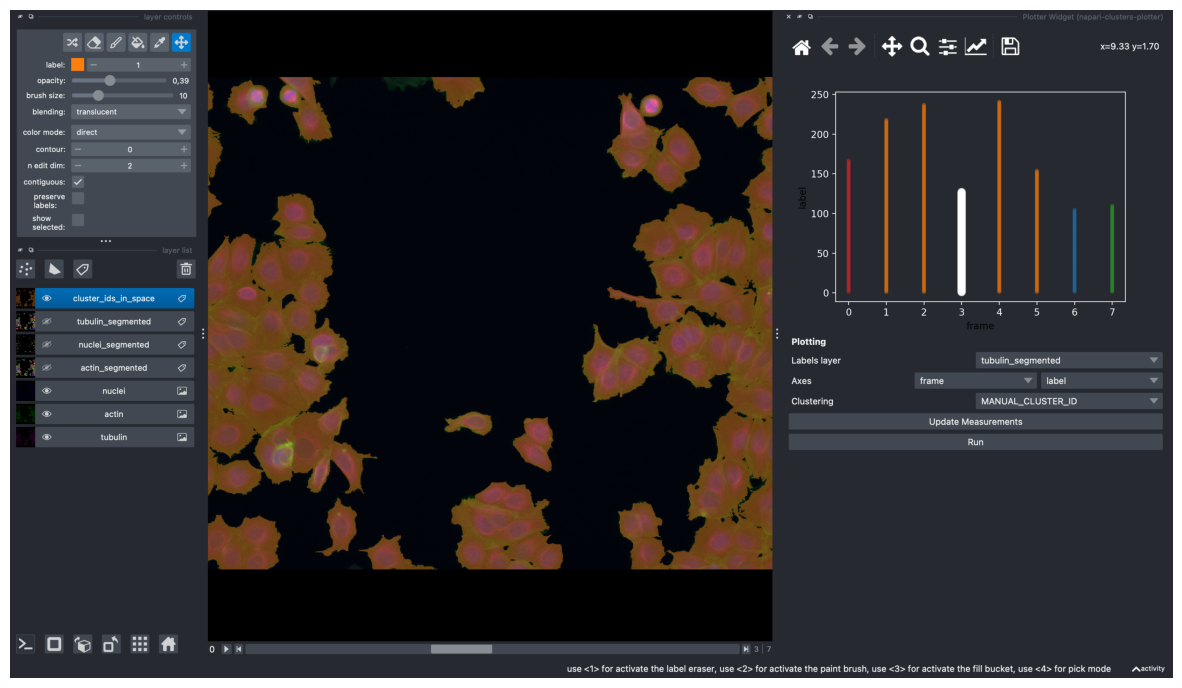

/Users/laura/micromamba/envs/devbio-napari-env/lib/python3.9/site-packages/napari/utils/_proxies.py:144: FutureWarning: Labels.color is deprecated since 0.4.19 and will be removed in 0.5.0, please set Labels.colormap directly with an instance of napari.utils.colormaps.DirectLabelColormap instead.
  setattr(self.__wrapped__, name, value)


In [20]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

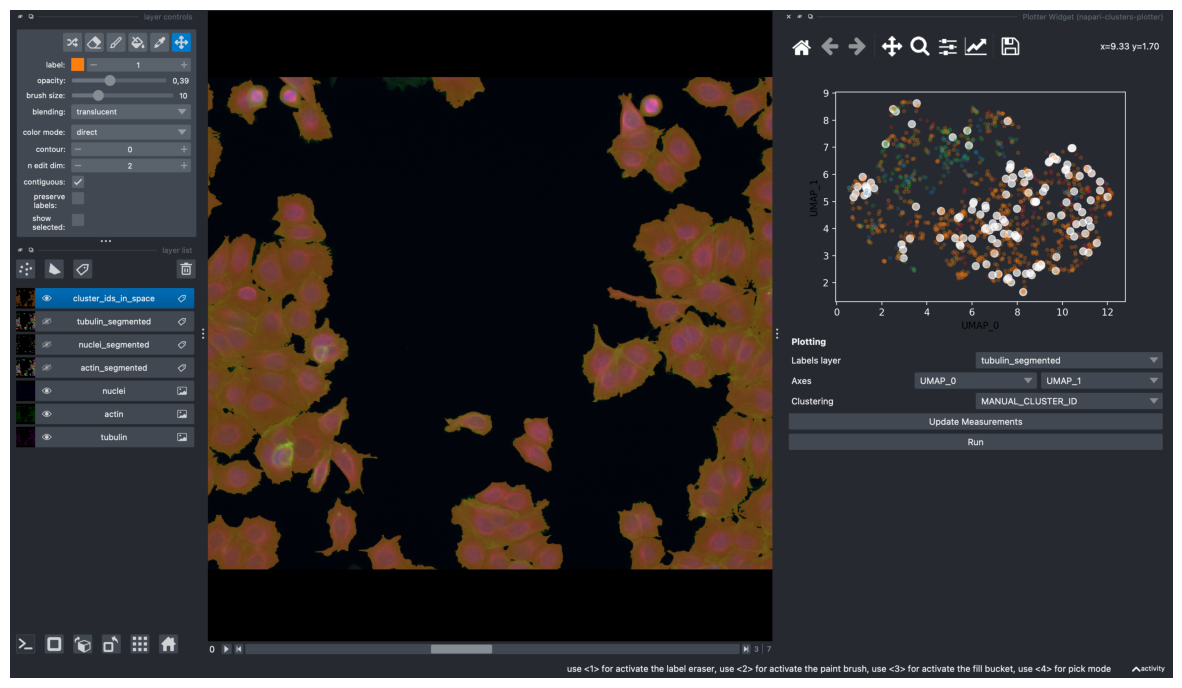

In [21]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

In [22]:
# get layer's properties containing UMAP results
df = pd.DataFrame(viewer.layers['tubulin_segmented'].properties)

In [23]:
from scipy.stats import spearmanr

correlations = {}

for column in df.columns:
    
    # don't compute correlation for these columns
    if column in ['label', 'frame', 'UMAP_0', 'UMAP_1', 't-SNE_0', 't-SNE_1', 'index'] or '_CLUSTER_ID' in column:
        continue
        
    corr = spearmanr(df[column], df['UMAP_1'])[0]
    correlations[column] = corr

# sort features based on the absolute value of correlation
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, correlation in sorted_features:
    print(f"{feature}: {correlation}")

mean_intensity_dapi: 0.5486188221448203
max_intensity_dapi: 0.5447799323141165
max_intensity_tubulin: 0.45156065722662525
mean_intensity_tubulin: 0.38965731646656065
eccentricity_actin: -0.38380397970617214
min_intensity_dapi: 0.321925933854268
eccentricity_tubulin: -0.31294447252513347
max_intensity_actin: 0.3044558243008318
min_intensity_tubulin: -0.2937342590715278
extent_actin: 0.28990719181235186
major_axis_length_actin: -0.24846681350221528
solidity_actin: 0.22133957965472273
minor_axis_length_tubulin: 0.22129073381247086
feret_diameter_max_actin: -0.20897341966214886
mean_intensity_actin: 0.1931511199413882
solidity_dapi: -0.18409916137391458
extent_tubulin: 0.17194977820693955
major_axis_length_tubulin: -0.13837588083639274
perimeter_actin: -0.1290950630698303
perimeter_crofton_actin: -0.12793093029711933
min_intensity_actin: -0.12193337426479882
feret_diameter_max_tubulin: -0.11935182987552069
extent_dapi: -0.10879372726200892
solidity_tubulin: 0.0877313119919435
minor_axis_le

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


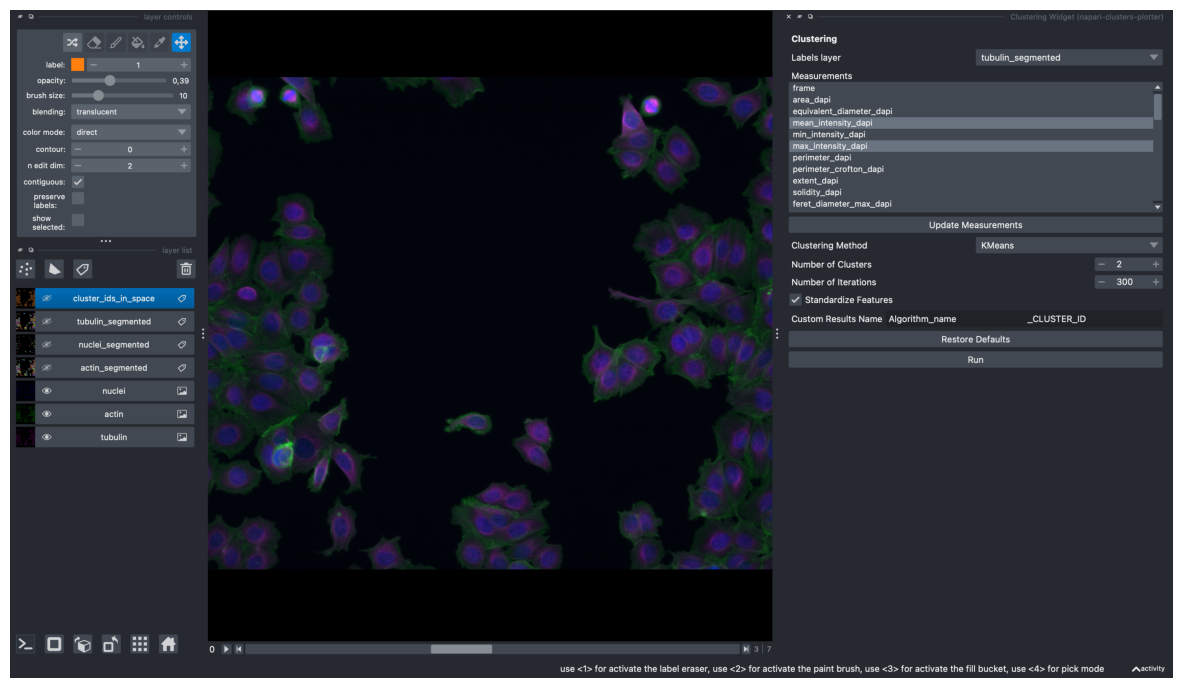

/Users/laura/micromamba/envs/devbio-napari-env/lib/python3.9/site-packages/napari/components/viewer_model.py:10: FutureWarning: Labels.color is deprecated since 0.4.19 and will be removed in 0.5.0, please set Labels.colormap directly with an instance of napari.utils.colormaps.DirectLabelColormap instead.
  TYPE_CHECKING,


In [24]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

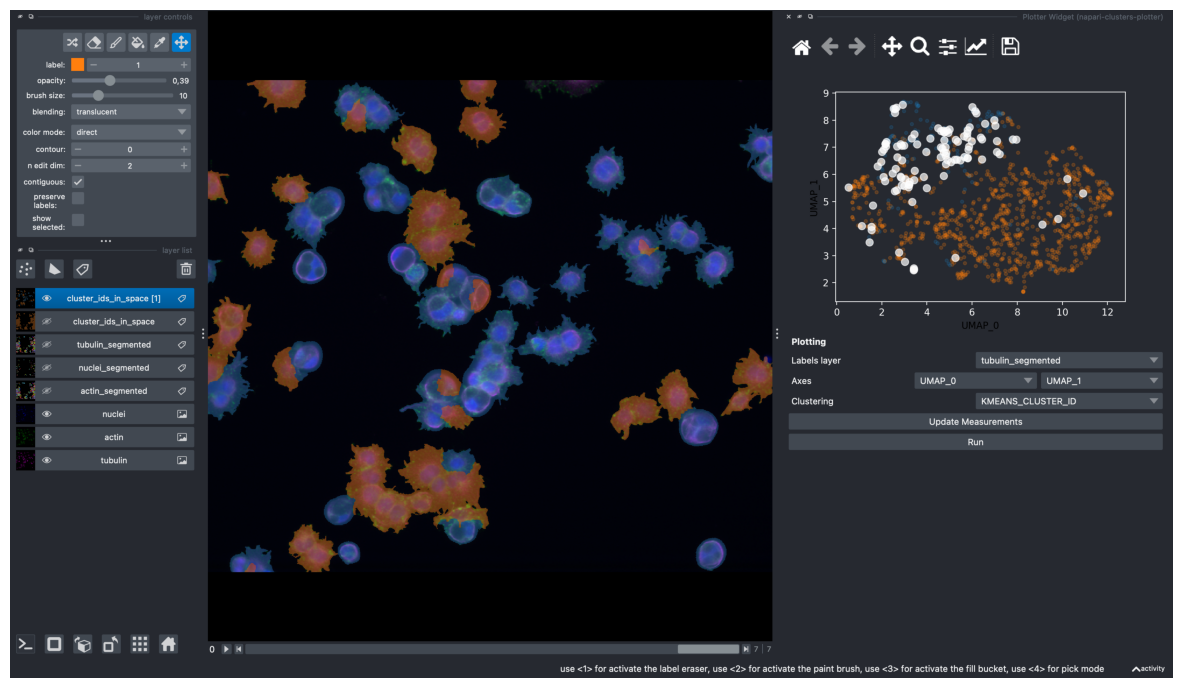

In [26]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()